In [85]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statistics as stats
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import parallel_coordinates

In [86]:
%store -r

In [87]:
spine_df.rename(columns = {
    'GroupingInclusions (1 include, 2 exclude)':'Grouping',
    'Genetics (1 yes, 2=NO)':'Genetics',
    'WhatSurgery (1=Nuss, 2= Spine, 3=other)':'WhatSurgery',
    'Top level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)':'Top level',
    'Bottom level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)':'Bottom level',
    'Shape (1=Rt-left S, 2=left-right, 3= kyphosis; 999=not applicable)':'Shape',
}, inplace=True)
spine_df.rename(columns = {
    'GroupingInclusions (1 include, 2 exclude)':'Grouping',
    'Genetics (1 yes, 2=NO)':'Genetics',
    'WhatSurgery (1=Nuss, 2= Spine, 3=other)':'WhatSurgery',
    'Top level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)':'Top level',
    'Bottom level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)':'Bottom level',
    'Shape (1=Rt-left S, 2=left-right, 3= kyphosis; 999=not applicable)':'Shape',
}, inplace=True)

In [88]:
chest_df.head()

,"GroupingInclusions (1 include, 2 exclude)","Genetics (1 yes, 2=NO)",PatientGender,PatientAge,PatientWeight,PatientRace,"WhatSurgery (1=Nuss, 2= Spine, 3=other)",Haller Index (999= not applicable),Risser,"Top level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)","Bottom level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)",# of levels,"Shape (1=Rt-left S, 2=left-right, 3= kyphosis; 999=not applicable)",Top degree,Bottom degree,SurgeryHX,Surgeries,DischargeDate,DODPostOpDay,PostOpHrs,PhoneFollowUpDate,PFUPostOpDay,ASA,Surgeon,PACUManagement = (0=picu; PACU morphine equivalents=PACU; PACU nothing - 0.01; Benadryl9+dose),"ComplementaryTherapies (0=none, 1=guided imagery, 2=massage, 3=guided imagry and massage)",ParentAge,ParentGender,ParentRace,Relationship,PatientPredictive,ParentPredictive,Hrs0_12MeanPainScore,Hrs13_24MeanPainScore,Hrs25_36MeanPainScore,Hrs37_48MeanPainScore,Hrs49_60MeanPainScore,Hrs61_72MeanPainScore,Hrs73_84MeanPainScore,Hrs85_96MeanPainScore,Hrs97_108MeanPainScore,Hrs109_120MeanPainScore,Hrs121_132MeanPainScore,Hrs133_144MeanPainScores,Hrs145_156MeanPainScores,Hrs157_168MeanPainScores,Hrs169_180MeanPainScores,Hrs181_192MeanPainScores,Mean,POD1APPTVAS,POD2APPTVAS,POD3APPTVAS,POD4APPTVAS,POD5APPTVAS,POD6APPTVAS,POD7APPTVAS,POD8APPTVAS,PDHomeAPPTVAS,PDClinic1APPTVAS,PDClinic2APPTVAS,PDClinic3APPTVAS,PDClinic4APPTVAS,PDClinic5APPTVAS,MeanVAS,PainDiff,Hrs0_12MeanPainScoreVASstd,Hrs0_12MeanPainScoreNstd,Hrs13_24MeanPainScoreVASstd,Hrs13_24MeanPainScoreNstd,Hrs25_36MeanPainScoreVASstd,Hrs25_36MeanPainScoreNstd,Hrs37_48MeanPainScoreVASstd,Hrs37_48MeanPainScoreNstd,Hrs49_60MeanPainScoreVASstd,Hrs49_60MeanPainScoreNstd,Hrs61_72MeanPainScoreVASstd,Hrs61_72MeanPainScoreNstd,Hrs73_84MeanPainScoreVASstd,Hrs73_84MeanPainScoreNstd,Hrs85_96MeanPainScoreVASstd,Hrs85_96MeanPainScoreNstd,Hrs97_108MeanPainScoreVASstd,Hrs97_108MeanPainScoreNstd,Hrs109_120MeanPainScoreVASstd,Hrs109_120MeanPainScoreNstd,Hrs121_132MeanPainScoreVASstd,Hrs121_132MeanPainScoreNstd,Hrs133_144MeanPainScoresVASstd,Hrs133_144MeanPainScoresNstd,Hrs145_156MeanPainScoresVASstd,Hrs145_156MeanPainScoresNstd,Hrs157_168MeanPainScoresVASstd,Hrs157_168MeanPainScoresNstd,Hrs169_180MeanPainScoresVASstd,Hrs169_180MeanPainScoresNstd,Hrs181_192MeanPainScoresVASstd,Hrs181_192MeanPainScoresNstd
PatientID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
501,1,1,1,194,65.0,1,1,3.90,999.0,999,999.0,999,999.0,999.0,999.0,0,999,2013-12-24 00:00:00,8.0,189.00,2013-12-30 00:00:00,14.0,1,6,777.000,0,777,1,1,2,90.0,90,7.67,7.83,7.21,7.20,7.50,6.33,5.71,7.25,7.50,5.83,5.5,6.0,7.0,6.5,4.5,7.0,6.658125,73.20,65.98,NaN,NaN,NaN,NaN,68.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.907333,-0.249208,7.919208,1.011875,8.079208,1.171875,7.459208,0.551875,7.449208,0.541875,7.749208,0.841875,6.579208,-0.328125,5.959208,-0.948125,7.499208,0.591875,7.749208,0.841875,6.079208,-0.828125,5.749208,-1.158125,6.249208,-0.658125,7.249208,0.341875,6.749208,-0.158125,4.749208,-2.158125,7.249208,0.341875
502,1,1,1,179,57.0,1,1,3.86,999.0,999,999.0,999,999.0,999.0,99.0,0,999,2013-12-22 00:00:00,4.0,93.50,2013-12-22 00:00:00,12.0,2,3,777.000,1,777,2,1,1,777.0,777,4.00,4.33,3.67,3.50,4.00,3.67,1.50,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.458750,45.36,29.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.43,NaN,NaN,2.989667,0.469083,3.530917,0.541250,3.860917,0.871250,3.200917,0.211250,3.030917,0.041250,3.530917,0.541250,3.200917,0.211250,1.030917,-1.958750,2.530917,-0.458750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,1,1,1,185,68.0,1,1,3.90,999.0,999,999.0,999,999.0,999.0,999.0,1,Reconstructive Surgeries on middle finger of l...,2014-03-28 00:00:00,4.0,96.00,2014-03-31 00:00:00,7.0,1,4,9.338,1,679,1,1,2,80.0,80,5.50,1.00,3.75,5.25,4.33,3.33,5.42,4.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.113750,36.08,38.14,37.11,72.16,NaN,NaN,NaN,NaN,NaN,35.05,22.68,NaN,NaN,NaN,4.020333,0.093417,5.406583,1.386250,0.906583,-3.113750,3.656583,-0.

In [89]:
chest_df.head()

,"GroupingInclusions (1 include, 2 exclude)","Genetics (1 yes, 2=NO)",PatientGender,PatientAge,PatientWeight,PatientRace,"WhatSurgery (1=Nuss, 2= Spine, 3=other)",Haller Index (999= not applicable),Risser,"Top level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)","Bottom level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)",# of levels,"Shape (1=Rt-left S, 2=left-right, 3= kyphosis; 999=not applicable)",Top degree,Bottom degree,SurgeryHX,Surgeries,DischargeDate,DODPostOpDay,PostOpHrs,PhoneFollowUpDate,PFUPostOpDay,ASA,Surgeon,PACUManagement = (0=picu; PACU morphine equivalents=PACU; PACU nothing - 0.01; Benadryl9+dose),"ComplementaryTherapies (0=none, 1=guided imagery, 2=massage, 3=guided imagry and massage)",ParentAge,ParentGender,ParentRace,Relationship,PatientPredictive,ParentPredictive,Hrs0_12MeanPainScore,Hrs13_24MeanPainScore,Hrs25_36MeanPainScore,Hrs37_48MeanPainScore,Hrs49_60MeanPainScore,Hrs61_72MeanPainScore,Hrs73_84MeanPainScore,Hrs85_96MeanPainScore,Hrs97_108MeanPainScore,Hrs109_120MeanPainScore,Hrs121_132MeanPainScore,Hrs133_144MeanPainScores,Hrs145_156MeanPainScores,Hrs157_168MeanPainScores,Hrs169_180MeanPainScores,Hrs181_192MeanPainScores,Mean,POD1APPTVAS,POD2APPTVAS,POD3APPTVAS,POD4APPTVAS,POD5APPTVAS,POD6APPTVAS,POD7APPTVAS,POD8APPTVAS,PDHomeAPPTVAS,PDClinic1APPTVAS,PDClinic2APPTVAS,PDClinic3APPTVAS,PDClinic4APPTVAS,PDClinic5APPTVAS,MeanVAS,PainDiff,Hrs0_12MeanPainScoreVASstd,Hrs0_12MeanPainScoreNstd,Hrs13_24MeanPainScoreVASstd,Hrs13_24MeanPainScoreNstd,Hrs25_36MeanPainScoreVASstd,Hrs25_36MeanPainScoreNstd,Hrs37_48MeanPainScoreVASstd,Hrs37_48MeanPainScoreNstd,Hrs49_60MeanPainScoreVASstd,Hrs49_60MeanPainScoreNstd,Hrs61_72MeanPainScoreVASstd,Hrs61_72MeanPainScoreNstd,Hrs73_84MeanPainScoreVASstd,Hrs73_84MeanPainScoreNstd,Hrs85_96MeanPainScoreVASstd,Hrs85_96MeanPainScoreNstd,Hrs97_108MeanPainScoreVASstd,Hrs97_108MeanPainScoreNstd,Hrs109_120MeanPainScoreVASstd,Hrs109_120MeanPainScoreNstd,Hrs121_132MeanPainScoreVASstd,Hrs121_132MeanPainScoreNstd,Hrs133_144MeanPainScoresVASstd,Hrs133_144MeanPainScoresNstd,Hrs145_156MeanPainScoresVASstd,Hrs145_156MeanPainScoresNstd,Hrs157_168MeanPainScoresVASstd,Hrs157_168MeanPainScoresNstd,Hrs169_180MeanPainScoresVASstd,Hrs169_180MeanPainScoresNstd,Hrs181_192MeanPainScoresVASstd,Hrs181_192MeanPainScoresNstd
PatientID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
501,1,1,1,194,65.0,1,1,3.90,999.0,999,999.0,999,999.0,999.0,999.0,0,999,2013-12-24 00:00:00,8.0,189.00,2013-12-30 00:00:00,14.0,1,6,777.000,0,777,1,1,2,90.0,90,7.67,7.83,7.21,7.20,7.50,6.33,5.71,7.25,7.50,5.83,5.5,6.0,7.0,6.5,4.5,7.0,6.658125,73.20,65.98,NaN,NaN,NaN,NaN,68.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.907333,-0.249208,7.919208,1.011875,8.079208,1.171875,7.459208,0.551875,7.449208,0.541875,7.749208,0.841875,6.579208,-0.328125,5.959208,-0.948125,7.499208,0.591875,7.749208,0.841875,6.079208,-0.828125,5.749208,-1.158125,6.249208,-0.658125,7.249208,0.341875,6.749208,-0.158125,4.749208,-2.158125,7.249208,0.341875
502,1,1,1,179,57.0,1,1,3.86,999.0,999,999.0,999,999.0,999.0,99.0,0,999,2013-12-22 00:00:00,4.0,93.50,2013-12-22 00:00:00,12.0,2,3,777.000,1,777,2,1,1,777.0,777,4.00,4.33,3.67,3.50,4.00,3.67,1.50,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.458750,45.36,29.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.43,NaN,NaN,2.989667,0.469083,3.530917,0.541250,3.860917,0.871250,3.200917,0.211250,3.030917,0.041250,3.530917,0.541250,3.200917,0.211250,1.030917,-1.958750,2.530917,-0.458750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,1,1,1,185,68.0,1,1,3.90,999.0,999,999.0,999,999.0,999.0,999.0,1,Reconstructive Surgeries on middle finger of l...,2014-03-28 00:00:00,4.0,96.00,2014-03-31 00:00:00,7.0,1,4,9.338,1,679,1,1,2,80.0,80,5.50,1.00,3.75,5.25,4.33,3.33,5.42,4.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.113750,36.08,38.14,37.11,72.16,NaN,NaN,NaN,NaN,NaN,35.05,22.68,NaN,NaN,NaN,4.020333,0.093417,5.406583,1.386250,0.906583,-3.113750,3.656583,-0.

# Clustering
## KMeans

In [90]:
from sklearn.cluster import KMeans

In [91]:
# Pain scores not part of clustering by patient characteristics.
spine_df_features = spine_df[spine_df.columns[:-82]]

# Haller index and what type of surgery not applicable so dropped.
spine_df_features = spine_df_features.drop('Haller Index (999= not applicable)', axis = 1)
spine_df_features = spine_df_features.drop('WhatSurgery', axis=1)

# Fill all 777 missing values of Risser, Shape, and Bottom degree with median values.
# Bottom degree dependent on shape so imputed similarly.
spine_df_features.loc[spine_df_features['Risser'] == 777.0, 'Risser'] = spine_df_features['Risser'].median()
spine_df_features.loc[spine_df_features['Shape'] == 777.0, 'Shape'] = spine_df_features['Shape'].median()
spine_df_features.loc[spine_df_features['Bottom degree'] == 999.0, 'Bottom degree'] = spine_df_features['Bottom degree'].median()

# Create categorical variables for top and bottom level categories.
spine_df_features['top_level_categories'] = pd.cut(spine_df_features['Top level'],[-1,7,19,24,999],labels=[1,2,3,4])
spine_df_features['bottom_level_categories'] = pd.cut(spine_df_features['Bottom level'],[-1,7,19,24,999],labels=[1,2,3,4])

spine_df_features

,Grouping,Genetics,PatientGender,PatientAge,PatientWeight,PatientRace,Risser,Top level,Bottom level,# of levels,Shape,Top degree,Bottom degree,SurgeryHX,top_level_categories,bottom_level_categories
PatientID,,,,,,,,,,,,,,,,
504,1,1,2,137,63.0,1,4.0,11,22.0,11,1.0,51.0,42.00,0,2,3
508,1,1,1,234,57.7,1,5.0,10,21.0,11,3.0,89.0,51.25,0,2,3
509,1,1,2,158,40.0,1,4.0,11,21.0,10,2.0,40.0,23.00,0,2,3
510,1,1,2,177,58.0,1,4.0,11,22.0,11,1.0,67.0,59.00,0,2,3
511,1,1,2,165,63.0,1,2.0,11,22.0,11,1.0,59.0,51.00,0,2,3
512,1,1,1,238,76.2,1,4.0,10,22.0,12,3.0,71.0,51.25,1,2,3
514,1,1,2,156,83.0,1,4.0,10,22.0,12,1.0,65.0,60.00,1,2,3
516,1,1,2,155,50.9,3,4.0,11,22.0,11,2.0,31.0,69.00,1,2,3
517,2,1,2,181,45.8,4,3.0,10,22.0,12,1.0,34.0,56.00,0,2,3


In [92]:
model3 = KMeans(n_clusters=3)
model3.fit(spine_df_features)
labels3 = model3.predict(spine_df_features)
cents3 = model3.cluster_centers_

model5 = KMeans(n_clusters=5)
model5.fit(spine_df_features)
labels5 = model5.predict(spine_df_features)
cents5 = model5.cluster_centers_

In [93]:
spine_df_labels = spine_df_features.copy()
spine_df_labels['kmeans3_label'] = labels3
spine_df_labels['kmeans5_label'] = labels5

In [94]:
cents3

array([[1.16666667e+00, 1.00000000e+00, 1.16666667e+00, 2.41500000e+02,
        6.75000000e+01, 1.00000000e+00, 4.66666667e+00, 1.06666667e+01,
        2.11666667e+01, 1.03333333e+01, 2.33333333e+00, 4.79166667e+01,
        5.18333333e+01, 6.66666667e-01, 2.00000000e+00, 2.83333333e+00],
       [1.05263158e+00, 1.10526316e+00, 1.73684211e+00, 1.85157895e+02,
        5.72052632e+01, 1.89473684e+00, 3.73684211e+00, 1.31052632e+01,
        2.13157895e+01, 8.21052632e+00, 1.52631579e+00, 3.78421053e+01,
        3.94736842e+01, 1.05263158e-01, 2.00000000e+00, 2.94736842e+00],
       [1.00000000e+00, 1.11764706e+00, 1.94117647e+00, 1.60941176e+02,
        6.27470588e+01, 2.47058824e+00, 3.17647059e+00, 1.11176471e+01,
        2.16470588e+01, 1.05294118e+01, 1.47058824e+00, 5.14117647e+01,
        5.79411765e+01, 1.76470588e-01, 2.00000000e+00, 2.94117647e+00]])

Text(0.5,1,'Correlations across features for spine surgery patients')

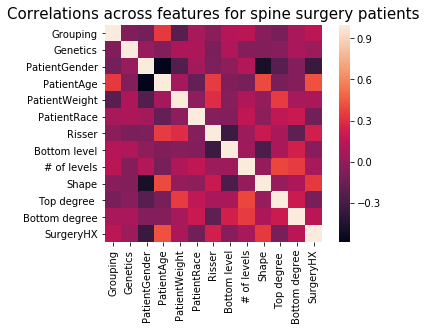

In [95]:
ax = plt.axes()
sb.heatmap(spine_df_features.corr(), square=True)
ax.set_title('Correlations across features for spine surgery patients', size=15)

Cluster 0
Grouping: Included
Genetics: Yes
Gender: Female
Age: 165.625
Weight: 49.225
Race: Value between black and asian
Risser: 2.75
Top level: 11.625
Bottom level: 21.25
\# of levels: 9.625
Shape: 1.75
Top degree: 34.5
Bottom degree: 61.875
Surgery HX: 0.25 (more likely not to have had surgery)

Cluster 1
Grouping: Included
Genetics: Yes
Gender: leaning Female
Age: 180.4
Weight: 55.72
Race: black and asian leaning black
Risser: 3.6
Top level: 12.6
Bottom level: 21
\# of levels: 8.4
Shape: 1.6
Top degree: 43.2
Bottom degree: 28.9
Surgery HX: 0.1 (more likely not to have had surgery)

Cluster 2
Grouping: Included
Genetics: Yes
Gender: Male
Age: 246.8
Weight: 60.24
Race: White
Risser: 4.6
Top level: 10.6
Bottom level: 21.2
\# of levels: 10.4
Shape: 2.4
Top degree: 49.7
Bottom degree: 51.8
Surgery HX: 0.8 (likely to have had surgery)

Cluster 3
Grouping: Included
Genetics: Yes
Gender: Female
Age: 195.375
Weight: 67.7625
Race: leaning white (1.125)
Risser: 4
Top level: 14.125
Bottom level: 21.75
\# of levels: 7.625
Shape: 1.5
Top degree: 32.375
Bottom degree: 49.375
Surgery HX: 0.125 (more likely not to have had surgery)

Cluster 4
Grouping: Included
Genetics: Yes
Gender: Female
Age: 161.55
Weight: 69.48
Race: 2.36 (middle of asian and black)
Risser: 3.63
Top level: 10.64
Bottom level: 21.82
\# of levels: 11.18
Shape: 1.27
Top degree: 60.45
Bottom degree: 55.27
Surgery HX: 0.09 (more likely not to have had surgery)

Text(0.5,1,'K Means with k=3')

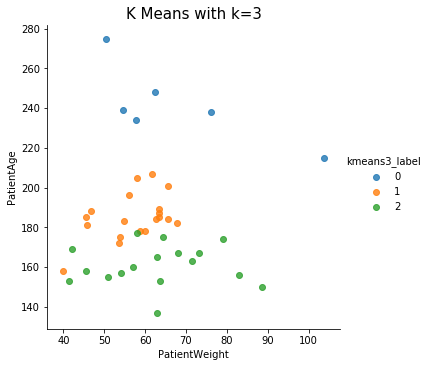

In [96]:
facet = sb.lmplot(data=spine_df_labels, x='PatientWeight', y='PatientAge', hue='kmeans3_label', 
                   fit_reg=False, legend=True, legend_out=True)
axes = facet.axes.flatten()
axes[0].set_title('K Means with k=3', size = 15)

Text(0.5,1,'K Means with k=5')

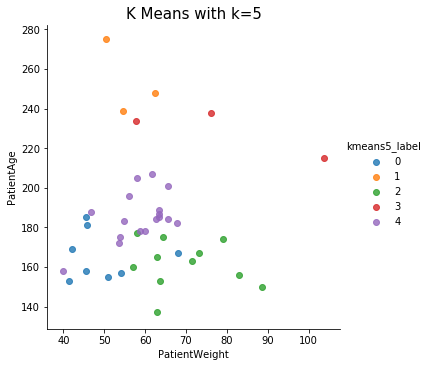

In [97]:
facet = sb.lmplot(data=spine_df_labels, x='PatientWeight', y='PatientAge', hue='kmeans5_label', 
                   fit_reg=False, legend=True, legend_out=True)
axes = facet.axes.flatten()
axes[0].set_title('K Means with k=5', size = 15)

In [98]:
spine_df_features.columns[:-2]

Index(['Grouping', 'Genetics', 'PatientGender', 'PatientAge', 'PatientWeight',
       'PatientRace', 'Risser', 'Top level', 'Bottom level', '# of levels',
       'Shape', 'Top degree ', 'Bottom degree', 'SurgeryHX'],
      dtype='object')

Text(0.5,1,'Correlations across features for 3 clusters')

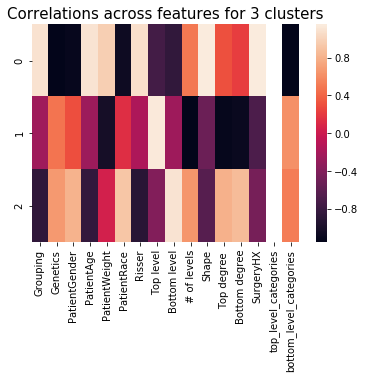

In [99]:
kmeans3_df = pd.DataFrame(cents3, columns = spine_df_features.columns)
kmeans3_df_norm = (kmeans3_df - kmeans3_df.mean())/kmeans3_df.std()
ax = plt.axes()
sb.heatmap(kmeans3_df_norm)
ax.set_title('Correlations across features for 3 clusters', size=15)

Text(0.5,1,'Correlations across features for 5 clusters')

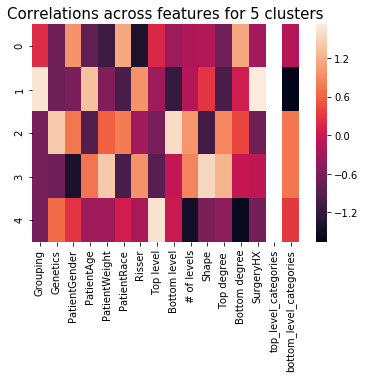

In [100]:
kmeans5_df = pd.DataFrame(cents5, columns = spine_df_features.columns)
kmeans5_df_norm = (kmeans5_df - kmeans5_df.mean())/kmeans5_df.std()
ax = plt.axes()
sb.heatmap(kmeans5_df_norm)
ax.set_title('Correlations across features for 5 clusters', size=15)

## PCA Plotting

In [101]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [102]:
# normalizing the feature set
spine_df_features.drop('top_level_categories',1,inplace=True)
spine_df_features.drop('bottom_level_categories',1,inplace=True)
spine_df_features_norm = (spine_df_features - spine_df_features.mean())/spine_df_features.std()

In [103]:
pca = sklearnPCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(spine_df_features_norm))

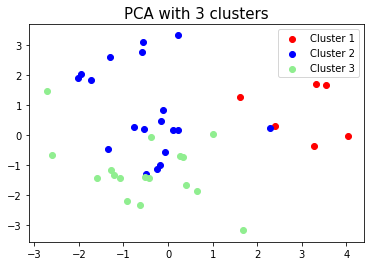

In [104]:
plt.scatter(transformed[labels3==0][0], transformed[labels3==0][1], label='Cluster 1', c='red')
plt.scatter(transformed[labels3==1][0], transformed[labels3==1][1], label='Cluster 2', c='blue')
plt.scatter(transformed[labels3==2][0], transformed[labels3==2][1], label='Cluster 3', c='lightgreen')
plt.title('PCA with 3 clusters', size = 15)
plt.legend()
plt.show()

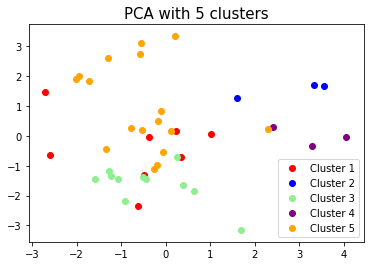

In [105]:
plt.scatter(transformed[labels5==0][0], transformed[labels5==0][1], label='Cluster 1', c='red')
plt.scatter(transformed[labels5==1][0], transformed[labels5==1][1], label='Cluster 2', c='blue')
plt.scatter(transformed[labels5==2][0], transformed[labels5==2][1], label='Cluster 3', c='lightgreen')
plt.scatter(transformed[labels5==3][0], transformed[labels5==3][1], label='Cluster 4', c='purple')
plt.scatter(transformed[labels5==4][0], transformed[labels5==4][1], label='Cluster 5', c='orange')
plt.title('PCA with 5 clusters', size = 15)
plt.legend()
plt.show()

## Parallel coordinates trendlines

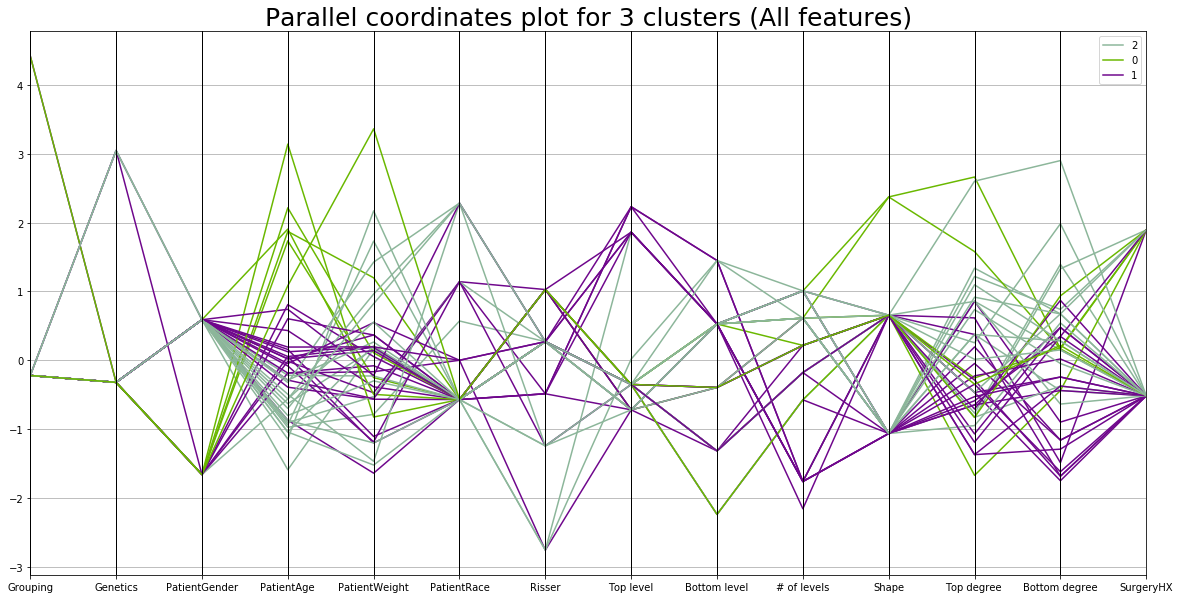

In [106]:
# Trendline changes across clusters for all variables.
plt.figure(figsize=(20,10))
plot_feats_all = list(spine_df_features_norm.columns)
data_norm_all = spine_df_features_norm.copy()[plot_feats_all]
data_norm_all['kmeans3_label'] = labels3

parallel_coordinates(data_norm_all, 'kmeans3_label')
plt.title("Parallel coordinates plot for 3 clusters (All features)", size = 25)
plt.show()

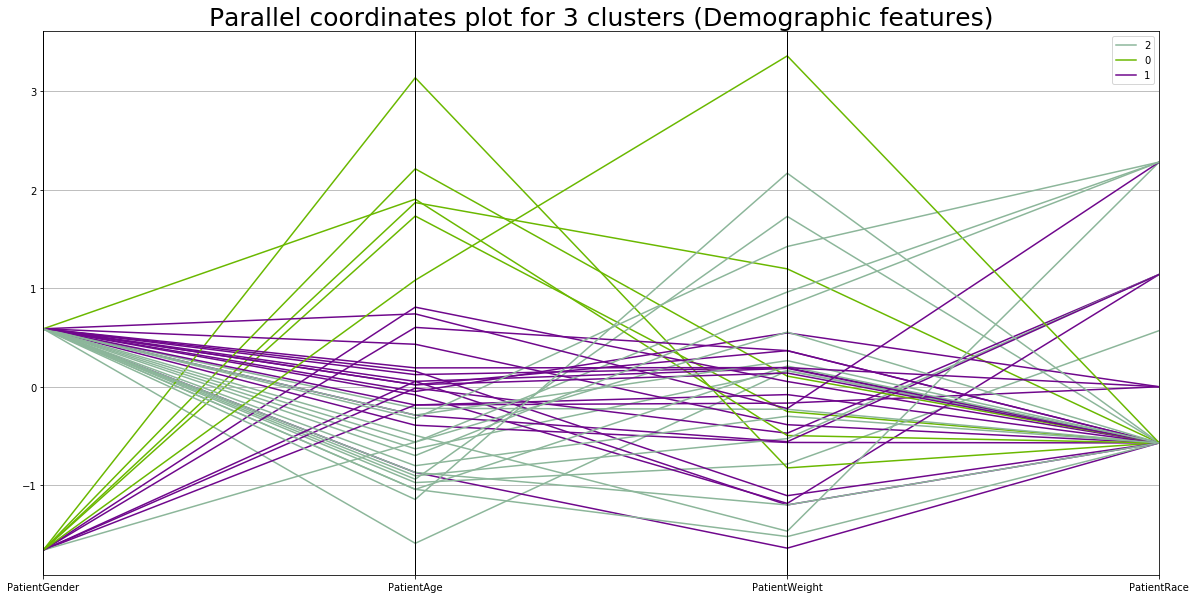

In [107]:
# Trendline changes across clusters for demographic variables.
plt.figure(figsize=(20,10))
plot_feats1 = ['PatientGender', 'PatientAge', 'PatientWeight', 'PatientRace']
data_norm_dem = spine_df_features_norm.copy()[plot_feats1]
data_norm_dem['kmeans3_label'] = labels3
plt.title("Parallel coordinates plot for 3 clusters (Demographic features)", size = 25)
parallel_coordinates(data_norm_dem, 'kmeans3_label')
plt.show()

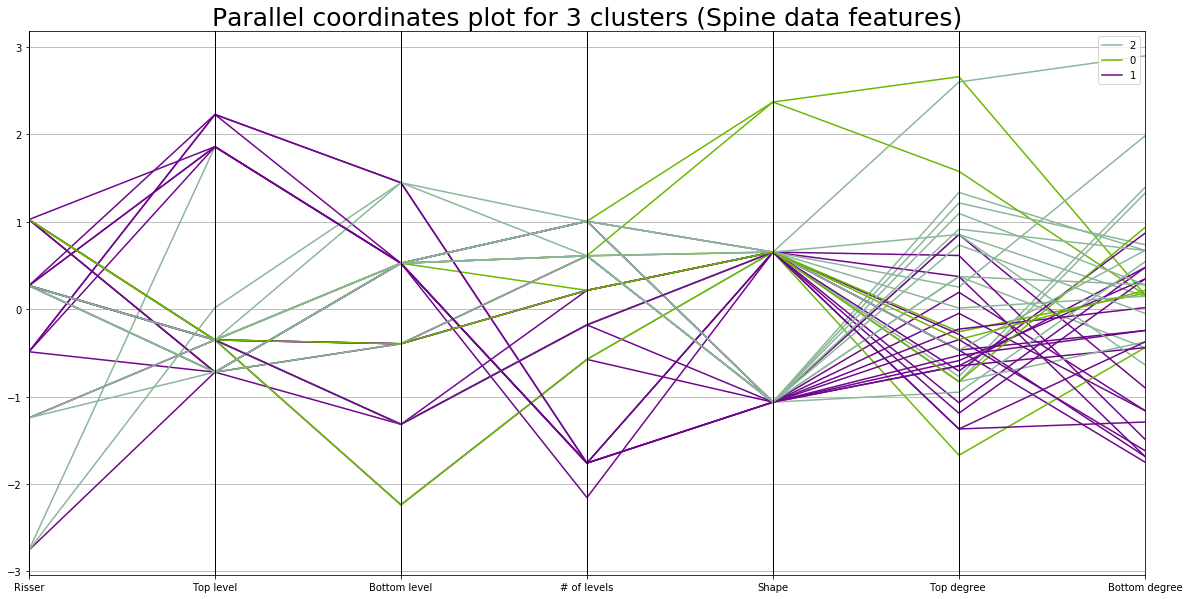

In [108]:
# Trendline changes across clusters for spine location and curvature values.
plt.figure(figsize=(20,10))
plot_feats2 = ['Risser', 'Top level', 'Bottom level', '# of levels',
       'Shape', 'Top degree ', 'Bottom degree']
data_norm_spine = spine_df_features_norm.copy()[plot_feats2]
data_norm_spine['kmeans3_label'] = labels3
plt.title("Parallel coordinates plot for 3 clusters (Spine data features)", size = 25)
parallel_coordinates(data_norm_spine, 'kmeans3_label')
plt.show()

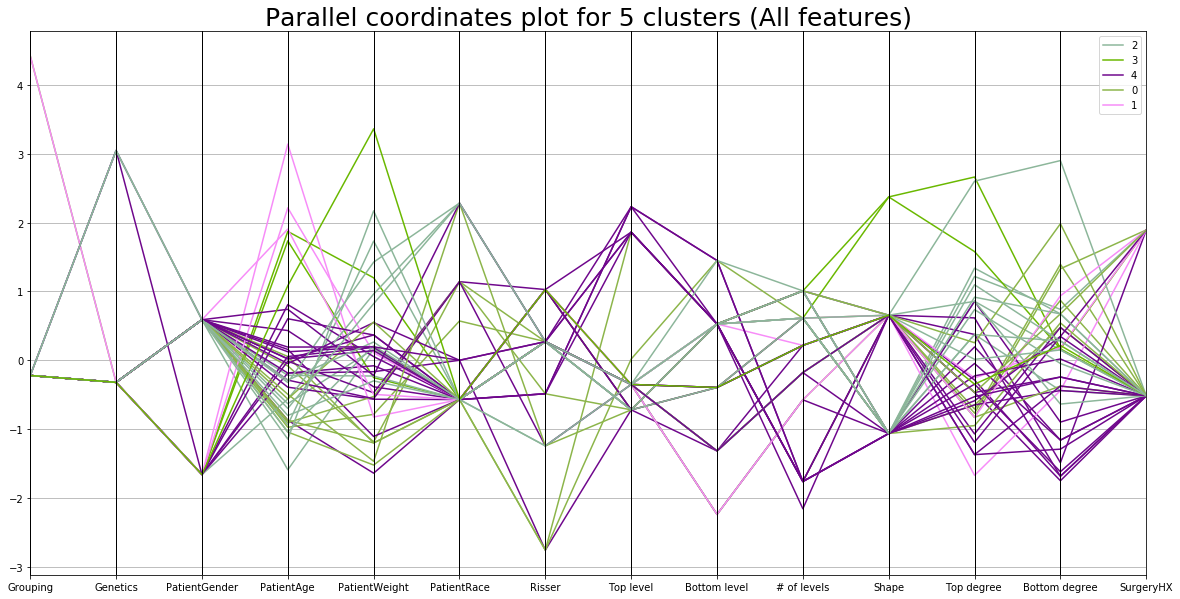

In [109]:
# FOR FIVE CLUSTERS
# Trendline changes across clusters for all variables.
plt.figure(figsize=(20,10))
plot_feats_all = list(spine_df_features_norm.columns)
data_norm_all = spine_df_features_norm.copy()[plot_feats_all]
data_norm_all['kmeans5_label'] = labels5
plt.title("Parallel coordinates plot for 5 clusters (All features)", size = 25)
parallel_coordinates(data_norm_all, 'kmeans5_label')
plt.show()

## Separating original dataframe by patient ID's using 3 clusters

In [110]:
spine_df['kmeans3'] = labels3
cluster1 = spine_df[spine_df['kmeans3'] == 0]
cluster2 = spine_df[spine_df['kmeans3'] == 1]
cluster3 = spine_df[spine_df['kmeans3'] == 2]

In [111]:
cluster1.shape

(6, 98)

In [112]:
cluster2.shape

(19, 98)

In [113]:
cluster3.shape

(17, 98)

In [114]:
standardized_cols = ['Hrs0_12MeanPainScoreNstd',
       'Hrs13_24MeanPainScoreNstd',
       'Hrs25_36MeanPainScoreNstd',
       'Hrs37_48MeanPainScoreNstd',
       'Hrs49_60MeanPainScoreNstd',
       'Hrs61_72MeanPainScoreNstd',
       'Hrs73_84MeanPainScoreNstd',
       'Hrs85_96MeanPainScoreNstd',
       'Hrs97_108MeanPainScoreNstd',
       'Hrs109_120MeanPainScoreNstd',
       'Hrs121_132MeanPainScoreNstd',
       'Hrs133_144MeanPainScoresNstd',
       'Hrs145_156MeanPainScoresNstd',
       'Hrs157_168MeanPainScoresNstd',
       'Hrs169_180MeanPainScoresNstd',
       'Hrs181_192MeanPainScoresNstd']

## Cluster 1 pain plot

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0,'Time interval')

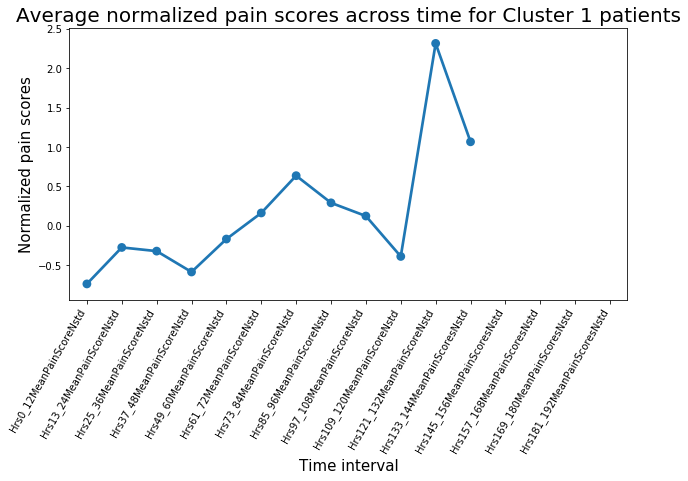

In [115]:
cluster1 = cluster1[standardized_cols]
plt.figure(figsize = (10,5))
sb.pointplot(list(cluster1.columns), [cluster1[rng].sum()/cluster1[rng].count() for rng in list(cluster1.columns)], order = list(cluster1.columns))
plt.xticks(rotation = 60, ha='right')

plt.title("Average normalized pain scores across time for Cluster 1 patients", size = 20)
plt.ylabel('Normalized pain scores', size = 15)
plt.xlabel('Time interval', size = 15)

Text(0.5,0,'Time interval')

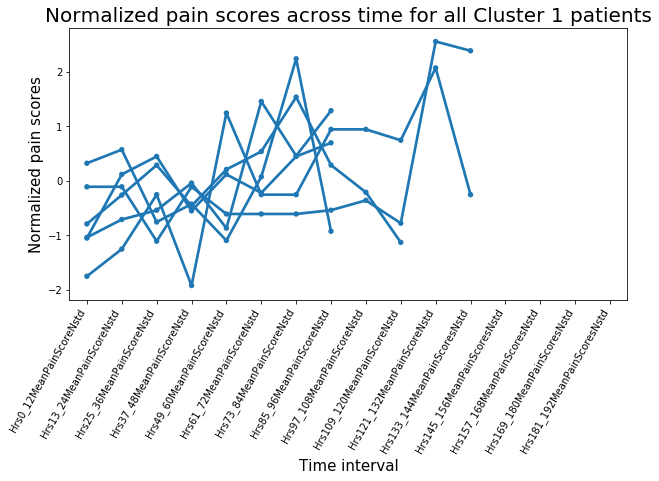

In [116]:
plt.figure(figsize = (10,5))
for i, (name, row) in enumerate(cluster1.iterrows()):
    sb.pointplot(list(cluster1.columns), row, order = list(cluster1.columns), markers = '.')
    plt.xticks(rotation = 60, ha='right')

plt.title("Normalized pain scores across time for all Cluster 1 patients", size = 20)
plt.ylabel('Normalized pain scores', size = 15)
plt.xlabel('Time interval', size = 15)

Text(0.5,0,'Time interval')

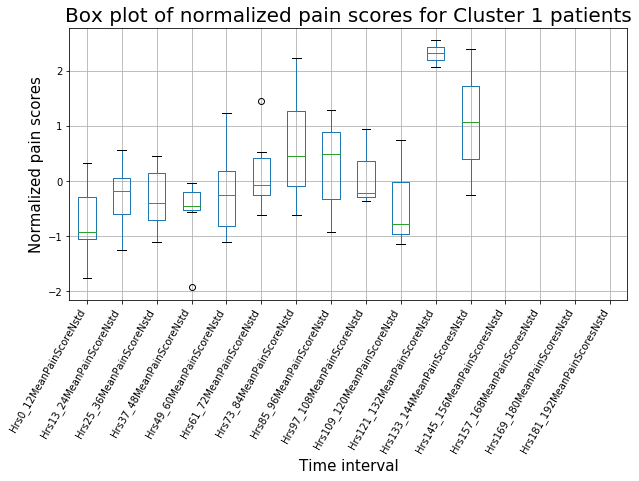

In [117]:
plt.figure(figsize = (10,5))
cluster1.boxplot()
plt.xticks(rotation = 60, ha='right')
plt.title("Box plot of normalized pain scores for Cluster 1 patients", size = 20)
plt.ylabel('Normalized pain scores', size = 15)
plt.xlabel('Time interval', size = 15)

## Cluster 2 pain plot

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0,'Time interval')

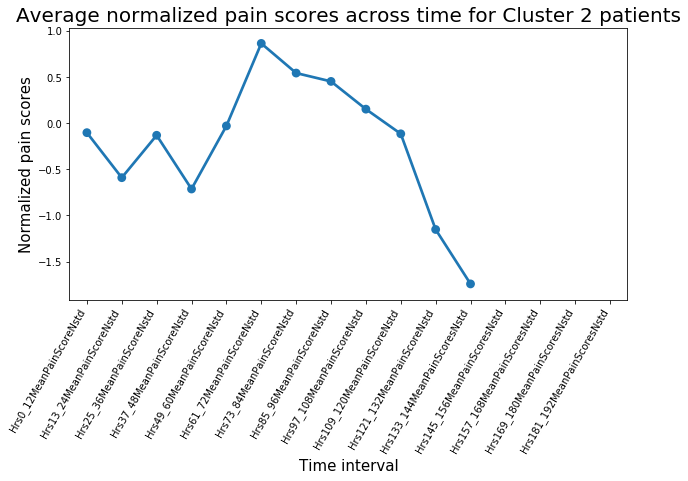

In [118]:
cluster2 = cluster2[standardized_cols]
plt.figure(figsize = (10,5))
sb.pointplot(list(cluster2.columns), [cluster2[rng].sum()/cluster2[rng].count() for rng in list(cluster2.columns)], order = list(cluster2.columns))
plt.xticks(rotation = 60, ha='right')
plt.title("Average normalized pain scores across time for Cluster 2 patients", size = 20)
plt.ylabel('Normalized pain scores', size = 15)
plt.xlabel('Time interval', size = 15)

Text(0.5,0,'Time interval')

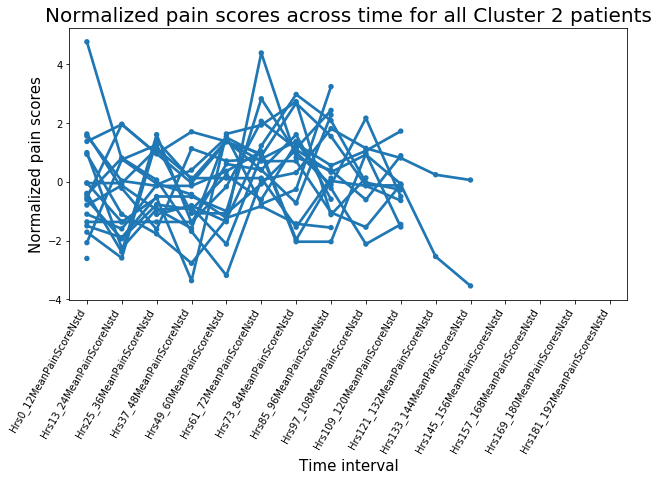

In [119]:
plt.figure(figsize = (10,5))
for i, (name, row) in enumerate(cluster2.iterrows()):
    sb.pointplot(list(cluster1.columns), row, order = list(cluster1.columns), markers = '.')
    plt.xticks(rotation = 60, ha='right')
    plt.title("Normalized pain scores across time for all Cluster 2 patients", size = 20)
plt.ylabel('Normalized pain scores', size = 15)
plt.xlabel('Time interval', size = 15)

Text(0.5,0,'Time interval')

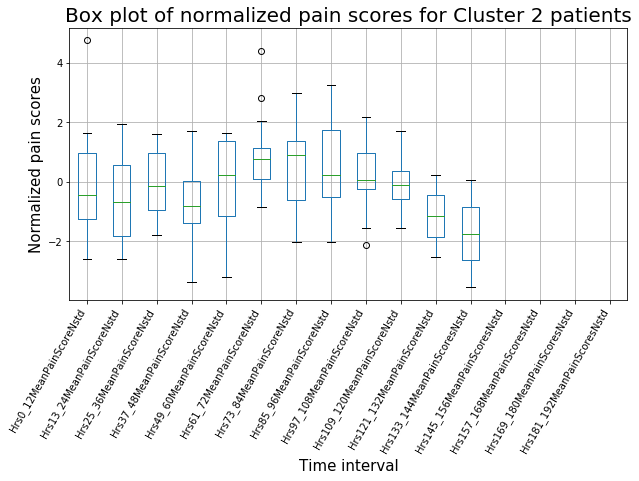

In [120]:
plt.figure(figsize = (10,5))
cluster2.boxplot()
plt.xticks(rotation = 60, ha='right')
plt.title("Box plot of normalized pain scores for Cluster 2 patients", size = 20)
plt.ylabel('Normalized pain scores', size = 15)
plt.xlabel('Time interval', size = 15)

## Cluster 3 pain plot

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0,'Time interval')

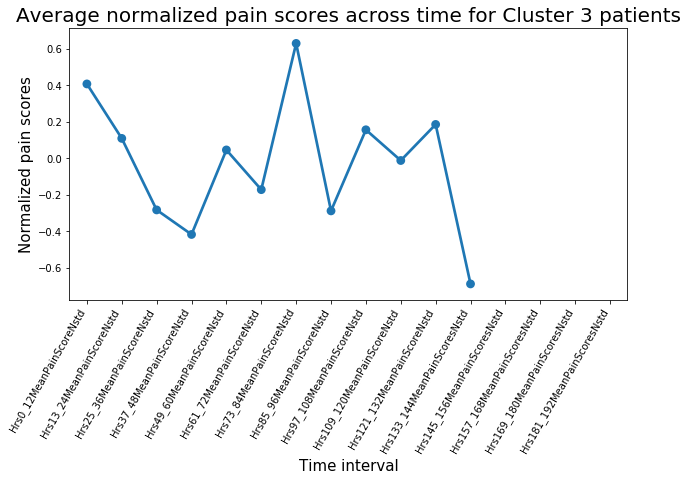

In [121]:
cluster3 = cluster3[standardized_cols]
plt.figure(figsize = (10,5))
sb.pointplot(list(cluster3.columns), [cluster3[rng].sum()/cluster3[rng].count() for rng in list(cluster3.columns)], order = list(cluster3.columns))
plt.xticks(rotation = 60, ha='right')
plt.title("Average normalized pain scores across time for Cluster 3 patients", size = 20)
plt.ylabel('Normalized pain scores', size = 15)
plt.xlabel('Time interval', size = 15)

Text(0.5,0,'Time interval')

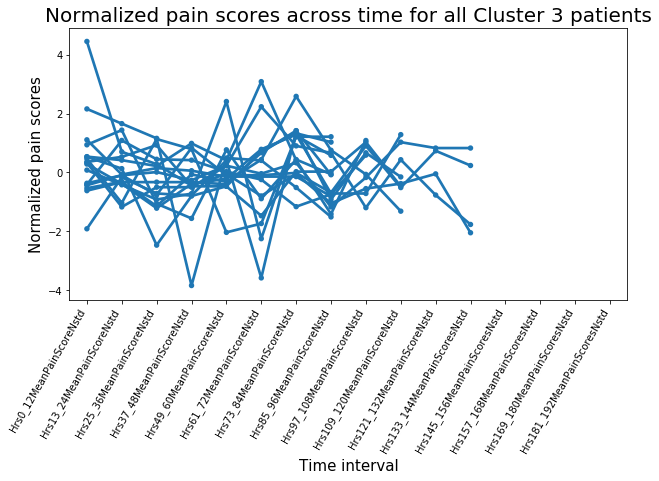

In [122]:
plt.figure(figsize = (10,5))
for i, (name, row) in enumerate(cluster3.iterrows()):
    sb.pointplot(list(cluster1.columns), row, order = list(cluster1.columns), markers = '.')
    plt.xticks(rotation = 60, ha='right')
plt.title("Normalized pain scores across time for all Cluster 3 patients", size = 20)
plt.ylabel('Normalized pain scores', size = 15)
plt.xlabel('Time interval', size = 15)

Text(0.5,0,'Time interval')

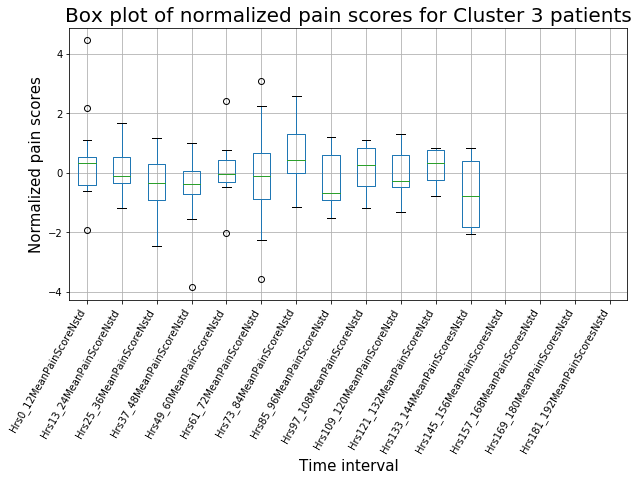

In [123]:
plt.figure(figsize = (10,5))
cluster3.boxplot()
plt.xticks(rotation = 60, ha='right')
plt.title("Box plot of normalized pain scores for Cluster 3 patients", size = 20)
plt.ylabel('Normalized pain scores', size = 15)
plt.xlabel('Time interval', size = 15)

## Cluster 1: Seemingly random trends, fluctuates
## Cluster 2: Pain increases over time
## Cluster 3: Pain decreases over time

## Cluster 1: Very low Risser, low end of age, mostly white
## Cluster 2: Highest age and weight, low bottom level, high shape, high top degree
## Cluster 3: Very low Risser, middle of age, mostly had surgery before